#  "TYPHOID DATASET"


#### The goal of this EDA project is to analyze factors contributing to the challenge of managing typhoid fever. 

### IMPORTING THE DATASET

In [1]:
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt  
import seaborn as sns    
data=pd.read_csv(r"C:\Users\Acer\4-SEM\A_EDA\Typhoid-Fever-data.csv")

In [2]:
data.head(5)

,Patient ID,Age,Gender,Symptoms Severity,Hemoglobin (g/dL),Platelet Count,Blood Culture Bacteria,Urine Culture Bacteria,Calcium (mg/dL),Potassium (mmol/L),Current Medication,Treatment Duration,Treatment Outcome
0,1,38,Female,Low,24.012919,259366,Escherichia coli,Klebsiella pneumoniae,8.7,9.079248,Amoxicillin,15 days,Unsuccessful
1,2,48,Male,Moderate,12.300000,208128,Salmonella typhi,-,8.3,4.300000,Ceftriaxone,5 days,Successful
2,3,33,Male,High,10.700000,251028,Escherichia coli,-,10.0,3.800000,Azithromycin,15 days,Unsuccessful
3,4,56,Male,High,14.900000,157787,Salmonella typhi,Klebsiella pneumoniae,9.4,3.700000,Ceftriaxone,13 days,Successful
4,5,67,Male,NaN,13.100000,217075,Salmonella typhi,Escherichia coli,9.8,5.000000,Amoxicillin,13 days,NaN


#### DATA TYPES

In [3]:
data.dtypes

Patient ID                  int64
Age                         int64
Gender                     object
Symptoms Severity          object
Hemoglobin (g/dL)         float64
Platelet Count              int64
Blood Culture Bacteria     object
Urine Culture Bacteria     object
Calcium (mg/dL)           float64
Potassium (mmol/L)        float64
Current Medication         object
Treatment Duration         object
Treatment Outcome          object
dtype: object

In [4]:
data.shape

(5760, 13)

## NUMERIC FEATURES

###### PATIENT ID
###### AGE
###### HEMOGLOBIN
###### PLATELET COUNT
###### CALCIUM
###### POTASIUM

## CATOGORICAL FEATURES
##### Gender   
##### Symptoms Severity   
##### Blood Culture Bacteria   
##### Urine Culture Bacteria   
##### Current MedicatioN   
##### Treatment Outcome
###### TREATMENT DURATION

In [5]:
import pandas as pd

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numeric feature
skewness = numeric_cols.skew()

# Display the skewness of each feature
print("Skewness of each numeric feature:")
print(skewness)


Skewness of each numeric feature:
Patient ID            0.000000
Age                   0.068930
Hemoglobin (g/dL)     2.396832
Platelet Count       -0.014666
Calcium (mg/dL)       9.776557
Potassium (mmol/L)    4.100395
dtype: float64


In [6]:
data.describe()

,Patient ID,Age,Hemoglobin (g/dL),Platelet Count,Calcium (mg/dL),Potassium (mmol/L)
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,2880.500000,43.092361,12.993261,209146.474653,9.054488,4.567818
std,1662.913107,14.910935,2.640090,50014.224866,2.439132,1.382174
min,1.000000,18.000000,10.000000,120255.000000,0.021594,3.500000
25%,1440.750000,31.000000,11.300000,168405.000000,8.500000,3.900000
50%,2880.500000,42.000000,12.600000,211847.000000,9.000000,4.300000
75%,4320.250000,55.000000,13.900000,251028.000000,9.500000,4.700000
max,5760.000000,70.000000,24.986969,299799.000000,78.168298,14.520085


# NULL VALUES

In [7]:
data.isnull().sum()

Patient ID                  0
Age                         0
Gender                      0
Symptoms Severity         629
Hemoglobin (g/dL)           0
Platelet Count              0
Blood Culture Bacteria    832
Urine Culture Bacteria      0
Calcium (mg/dL)             0
Potassium (mmol/L)          0
Current Medication          0
Treatment Duration        731
Treatment Outcome         576
dtype: int64

In [8]:
# Drop duplicate rows
df=data
df.drop_duplicates(inplace=True)
print("Duplicate values are dropped")
# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)

# 'Age' is object type, convert it to integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Hemoglobin (g/dL)'] = pd.to_numeric(df['Hemoglobin (g/dL)'], errors='coerce')
df['Platelet Count'] = pd.to_numeric(df['Platelet Count'], errors='coerce')
df['Calcium (mg/dL)'] = pd.to_numeric(df['Calcium (mg/dL)'], errors='coerce')
df['Potassium (mmol/L)'] = pd.to_numeric(df['Potassium (mmol/L)'], errors='coerce')

# Recheck for any remaining missing values after type conversion
print("\nMissing Values After Conversion:")
print(df.isnull().sum())

Duplicate values are dropped

Missing Values After Conversion:
Patient ID                0
Age                       0
Gender                    0
Symptoms Severity         0
Hemoglobin (g/dL)         0
Platelet Count            0
Blood Culture Bacteria    0
Urine Culture Bacteria    0
Calcium (mg/dL)           0
Potassium (mmol/L)        0
Current Medication        0
Treatment Duration        0
Treatment Outcome         0
dtype: int64


In [9]:
import pandas as pd

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numeric feature
skewness = numeric_cols.skew()

# Display the skewness of each feature
print("Skewness of each numeric feature:")
print(skewness)
data=df.copy()

Skewness of each numeric feature:
Patient ID            0.000000
Age                   0.068930
Hemoglobin (g/dL)     2.396832
Platelet Count       -0.014666
Calcium (mg/dL)       9.776557
Potassium (mmol/L)    4.100395
dtype: float64


# OUTLIERS

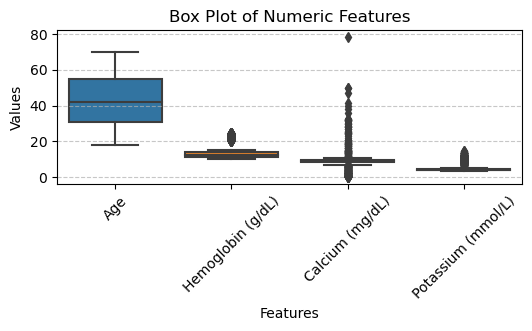

In [10]:
# Drop the 'Platelet Count' column
pc = data.drop(columns=['Platelet Count','Patient ID'])

# Select only numeric columns
numeric_cols = pc.select_dtypes(include=['float64', 'int64'])

# Calculate mean, median, and mode
statistics = numeric_cols.agg(['mean', 'median', lambda x: x.mode().iloc[0]])

# Plotting box plot
plt.figure(figsize=(6, 2))
sns.boxplot(data=numeric_cols)
plt.title('Box Plot of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)
columns_of_interest = ['Hemoglobin (g/dL)', 'Calcium (mg/dL)', 'Potassium (mmol/L)']



# Function to remove outliers for multiple columns
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Function to replace outliers with median
def replace_outliers_with_median(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = df[column].median()
        df[column] = np.where(
            (df[column] < lower_bound) | (df[column] > upper_bound),
            median_value,
            df[column]
        )
    return df

# Impute outliers
data_imputed = replace_outliers_with_median(df.copy(), columns_of_interest)

# Verify the changes
print(data_imputed.describe())
print(data_imputed.shape)
df=data_imputed.copy()

        Patient ID          Age  Hemoglobin (g/dL)  Platelet Count  \
count  5760.000000  5760.000000        5760.000000     5760.000000   
mean   2880.500000    43.092361          12.494670   209146.474653   
std    1662.913107    14.910935           1.423358    50014.224866   
min       1.000000    18.000000          10.000000   120255.000000   
25%    1440.750000    31.000000          11.300000   168405.000000   
50%    2880.500000    42.000000          12.600000   211847.000000   
75%    4320.250000    55.000000          13.800000   251028.000000   
max    5760.000000    70.000000          15.000000   299799.000000   

       Calcium (mg/dL)  Potassium (mmol/L)  
count      5760.000000         5760.000000  
mean          9.003537            4.282640  
std           0.556427            0.417993  
min           7.042946            3.500000  
25%           8.600000            3.900000  
50%           9.000000            4.300000  
75%           9.500000            4.700000  
max      

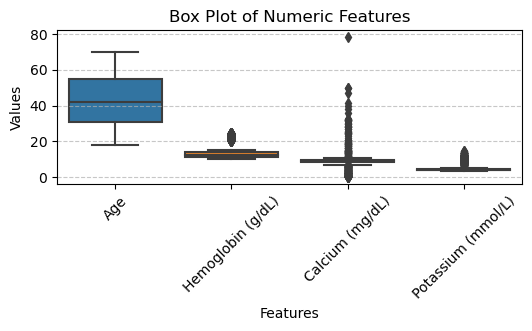

In [12]:
# Drop the 'Platelet Count' column
pc = data.drop(columns=['Platelet Count','Patient ID'])

# Select only numeric columns
numeric_cols = pc.select_dtypes(include=['float64', 'int64'])

# Calculate mean, median, and mode
statistics = numeric_cols.agg(['mean', 'median', lambda x: x.mode().iloc[0]])

# Plotting box plot
plt.figure(figsize=(6, 2))
sns.boxplot(data=numeric_cols)
plt.title('Box Plot of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

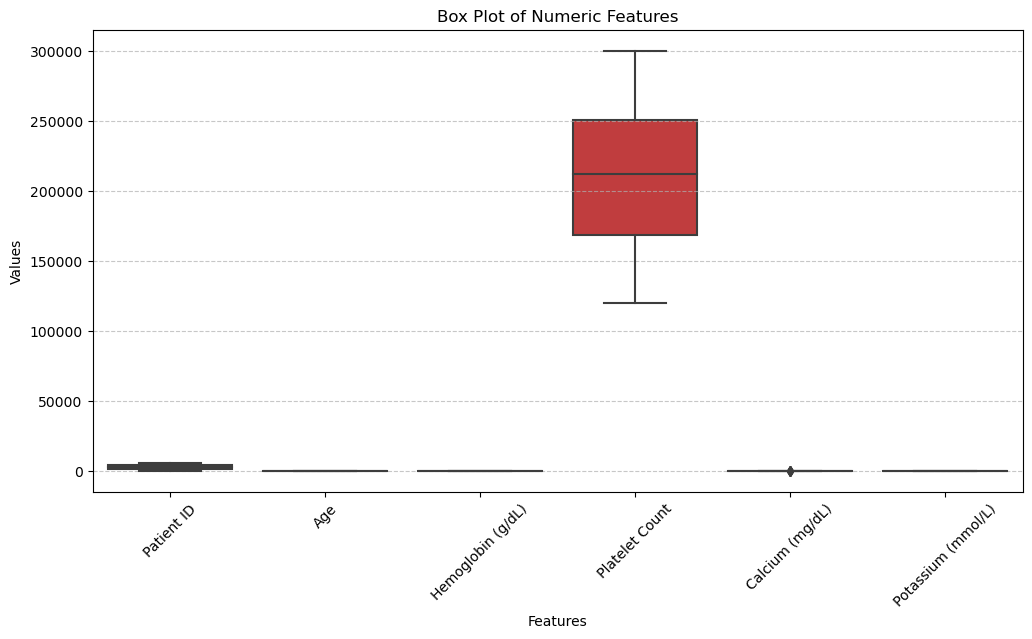

In [13]:
# Select only numeric columns

numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate mean, median, and mode
statistics = numeric_cols.agg(['mean', 'median', lambda x: x.mode().iloc[0]])


# Plotting box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_cols)
plt.title('Box Plot of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [14]:
import pandas as pd

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numeric feature
skewness = numeric_cols.skew()

# Display the skewness of each feature
print("Skewness of each numeric feature:")
print(skewness)


Skewness of each numeric feature:
Patient ID            0.000000
Age                   0.068930
Hemoglobin (g/dL)     0.000970
Platelet Count       -0.014666
Calcium (mg/dL)       0.029520
Potassium (mmol/L)   -0.061456
dtype: float64


## DATA DISTRIBUTION

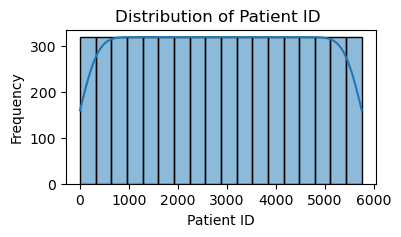

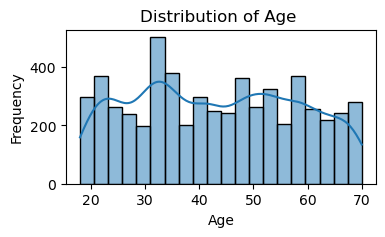

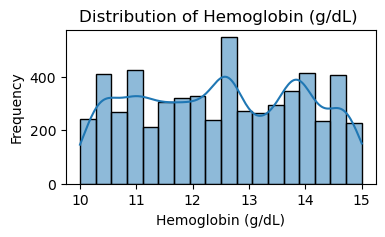

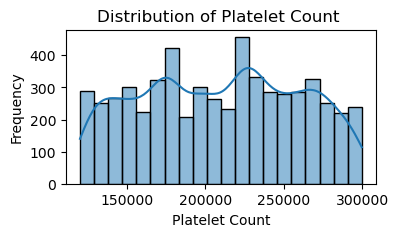

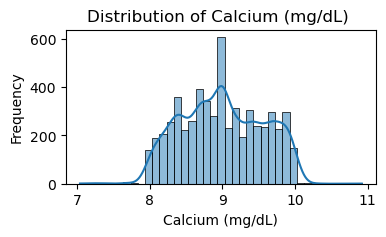

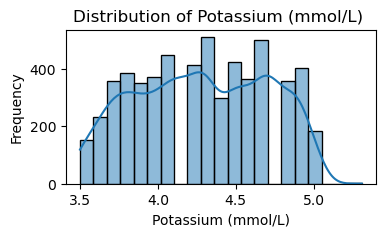

In [15]:

# Select only the numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the distribution and display skewness for each numerical column
for column in numeric_df.columns:
    plt.figure(figsize=(4 ,2))
    sns.histplot(numeric_df[column], kde=True)
    skewness = numeric_df[column].skew()
    plt.title(f'Distribution of {column} ')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


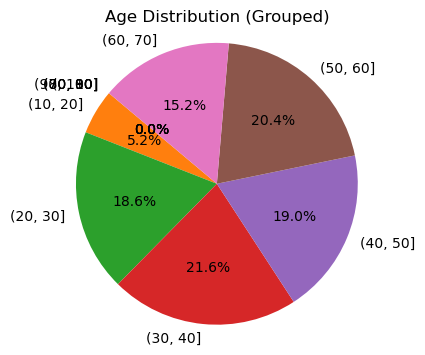

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the age bins
bins = range(0, 101, 10)  # Create bins from 0 to 100 with a width of 10

# Create age groups using pd.cut()
age_groups = pd.cut(data['Age'], bins=bins)

# Calculate the frequency of each age group
age_group_counts = age_groups.value_counts().sort_index()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution (Grouped)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the plot
plt.show()


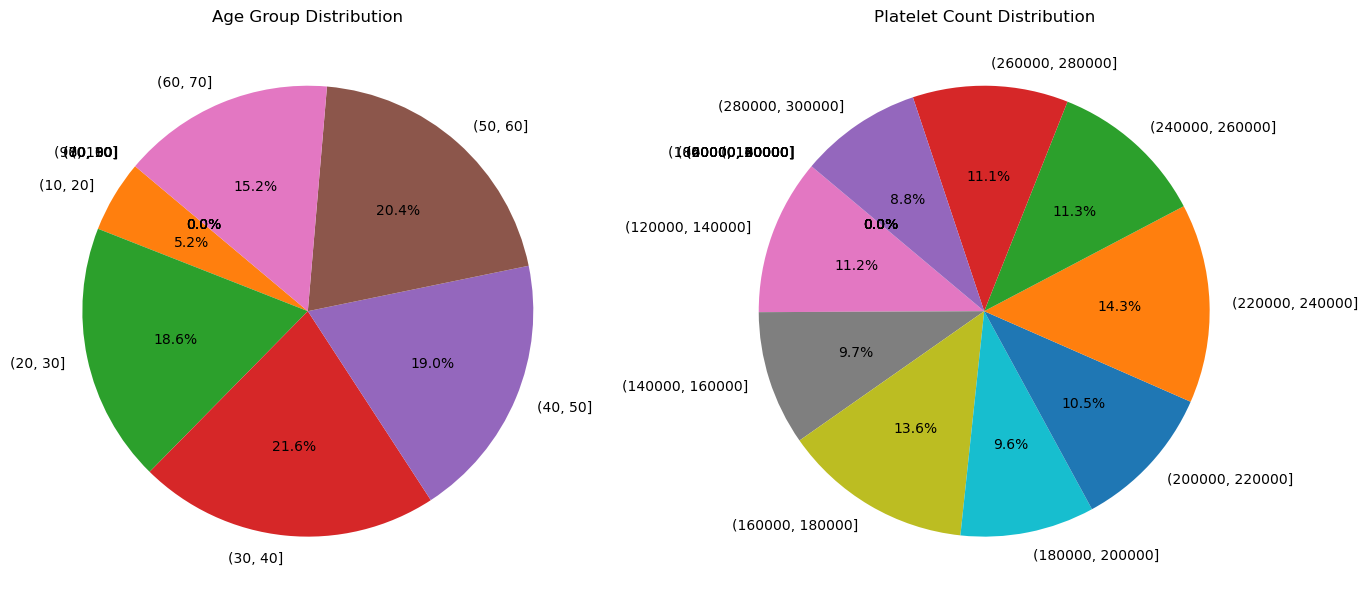

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Define the age bins
age_bins = range(0, 101, 10)  # Create bins from 0 to 100 with a width of 10

# Create age groups using pd.cut()
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

# Calculate the frequency of each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Define the platelet count bins
platelet_bins = range(0, int(df['Platelet Count'].max()) + 20000, 20000)  # Create bins from 0 to the maximum platelet count with a width of 10000

# Create platelet count groups using pd.cut()
df['Platelet Count Group'] = pd.cut(df['Platelet Count'], bins=platelet_bins)

# Calculate the frequency of each platelet count group
platelet_count_group_counts = df['Platelet Count Group'].value_counts().sort_index()

# Plotting the pie charts side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for age group distribution
ax1.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
ax1.set_title('Age Group Distribution')

# Pie chart for platelet count distribution
ax2.pie(platelet_count_group_counts, labels=platelet_count_group_counts.index, autopct='%1.1f%%', startangle=140)
ax2.set_title('Platelet Count Distribution')

# Display the plots
plt.show()


C:\Users\Acer\AppData\Local\Temp\ipykernel_15292\1862937790.py:29: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


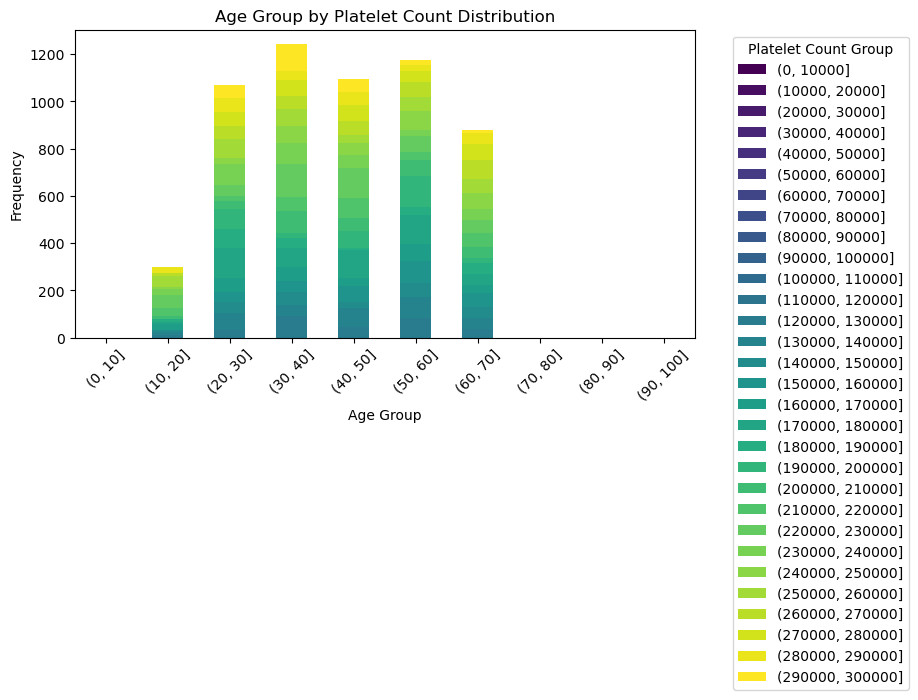

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Define the age bins
age_bins = range(0, 101, 10)  # Create bins from 0 to 100 with a width of 10

# Create age groups using pd.cut()
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

# Define the platelet count bins
platelet_bins = range(0, int(df['Platelet Count'].max()) + 10000, 10000)  # Create bins from 0 to the maximum platelet count with a width of 10000

# Create platelet count groups using pd.cut()
df['Platelet Count Group'] = pd.cut(df['Platelet Count'], bins=platelet_bins)

# Calculate the frequency of each combination of age group and platelet count group
age_platelet_counts = df.groupby(['Age Group', 'Platelet Count Group']).size().unstack().fillna(0)

# Plotting the stacked bar chart
age_platelet_counts.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='viridis')
plt.title('Age Group by Platelet Count Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.legend(title='Platelet Count Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# AGE DISTRIBUTION

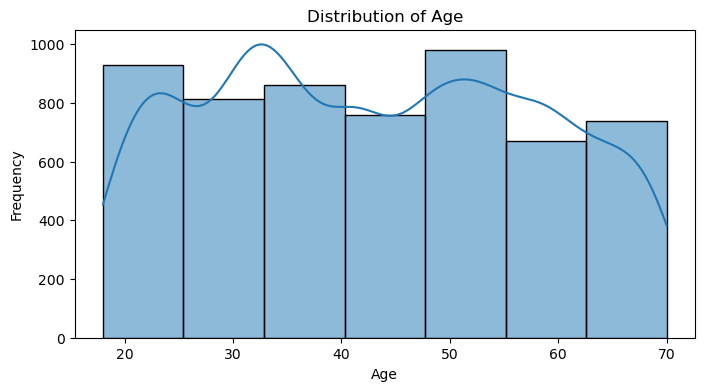

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Plotting the histogram of Age with more bins for accuracy
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=7, kde=True) 
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


# UNIQUE VALUES 

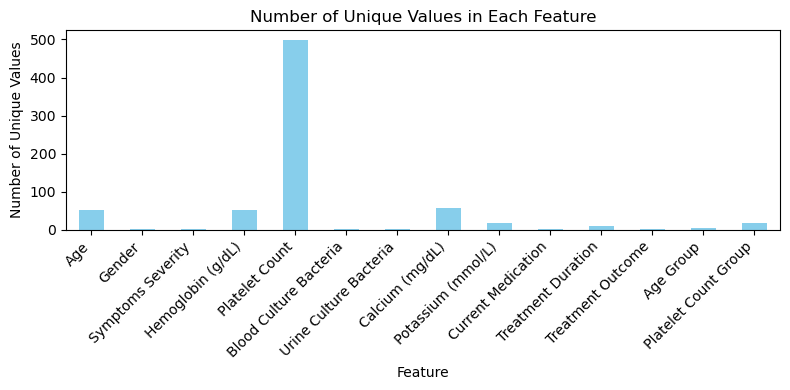

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

data=df
# Calculate the number of unique values for each feature, excluding 'Patient ID'
unique_counts = data.drop(columns=['Patient ID']).nunique()

# Plotting
plt.figure(figsize=(8,4))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values in Each Feature')
plt.xlabel('Feature')
plt.ylabel('Number of Unique Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# CORELATION & COVARIANCE

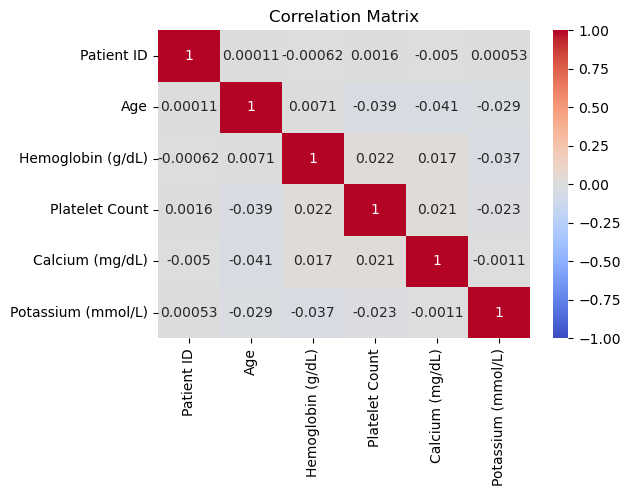

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=data
# Select numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()

# Calculate covariance matrix
covariance_matrix = numeric_cols.cov()

# Display correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


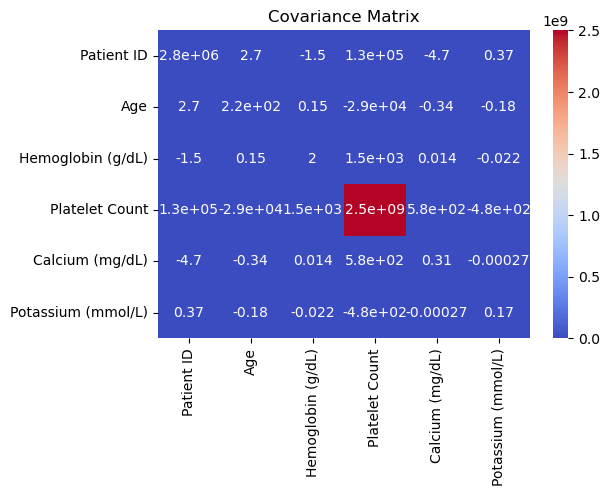

In [22]:

# Display covariance matrix
plt.figure(figsize=(6, 4))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm')
plt.title("Covariance Matrix")
plt.show()


#### Univariate analysis examines a single variable to summarize its distribution and characteristics.
#### Bivariate analysis explores the relationship between two variables to understand their association and interaction.
#### Multivariate analysis investigates multiple variables simultaneously to understand complex relationships and patterns among them.



| Parameter       | Normal Range                        |
|-----------------|-------------------------------------|
| Hemoglobin      | Men: 13.8 to 17.2 g/dL              |
|                 | Women: 12.1 to 15.1 g/dL            |
| Platelet Count  | 150,000 to 450,000 platelets/µL     |
| Calcium         | 8.5 to 10.2 mg/dL                   |
| Potassium       | 3.6 to 5.2 millimoles per liter (mmol/L) |

# UNIVARIATE 

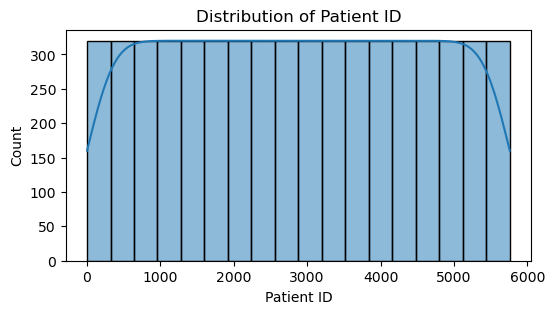

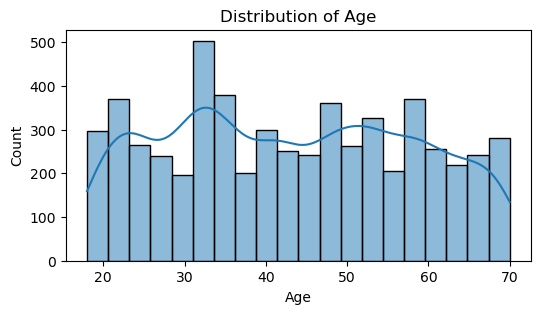

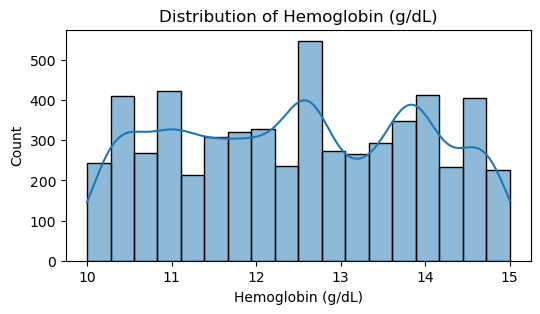

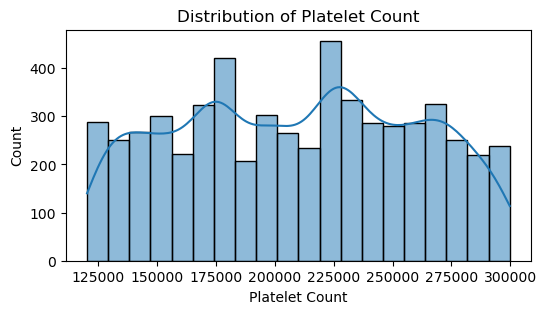

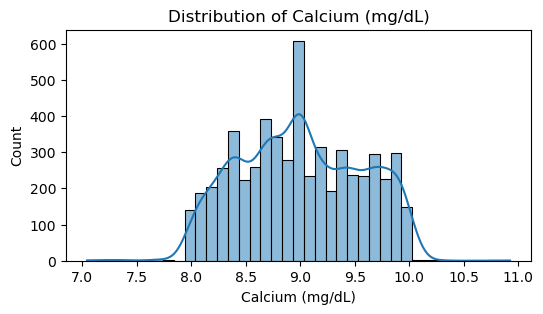

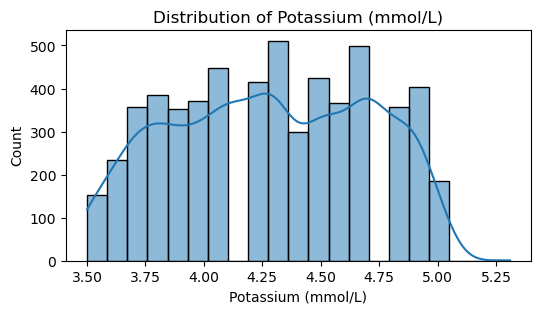

In [23]:
# Plot histograms for numeric attributes
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

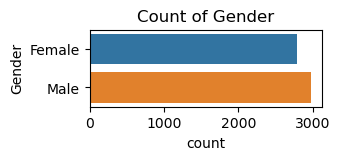

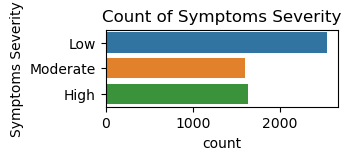

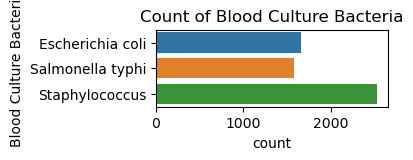

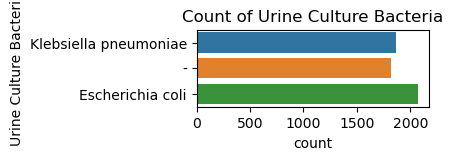

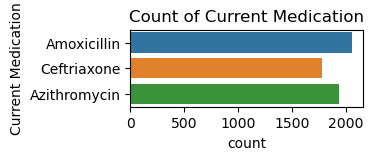

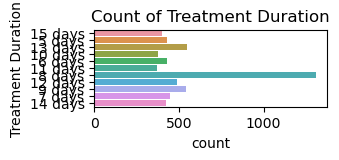

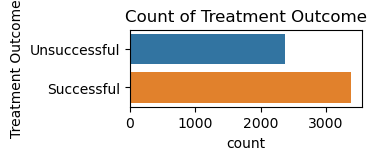

In [24]:


# Plot bar charts for categorical attributes
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(3, 1))
    sns.countplot(y=df[column].dropna())
    plt.title(f'Count of {column}')
    plt.show()

# BIVARIATE ANALYSIS

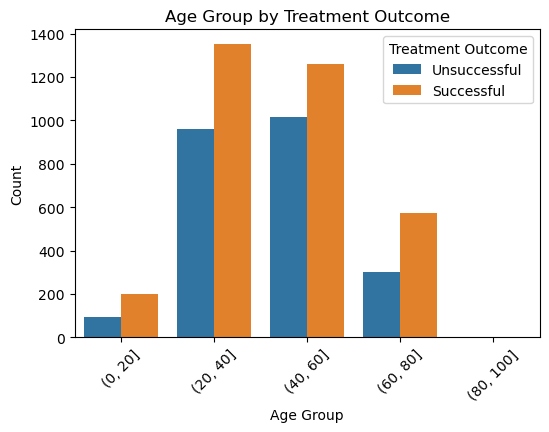

In [25]:
# Hypothesis 7: Patterns in treatment outcomes across different age groups

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the age bins
age_bins = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100])

# Create a crosstab for visualization
age_group_success = pd.crosstab(age_bins, df['Treatment Outcome'])

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x=age_bins, hue='Treatment Outcome', data=df)
plt.title('Age Group by Treatment Outcome')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Treatment Outcome', loc='upper right')
plt.show()


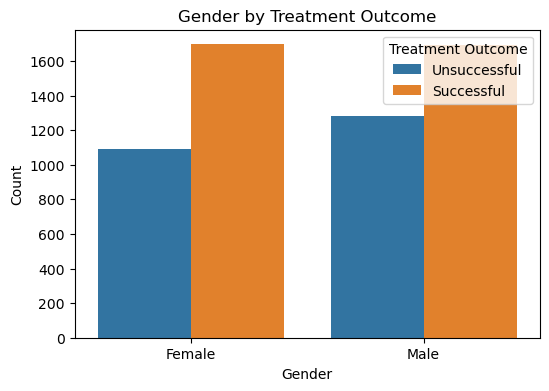

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis 9: Treatment outcomes between male and female patients

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Treatment Outcome', data=df)
plt.title('Gender by Treatment Outcome')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Treatment Outcome', loc='upper right')
plt.show()


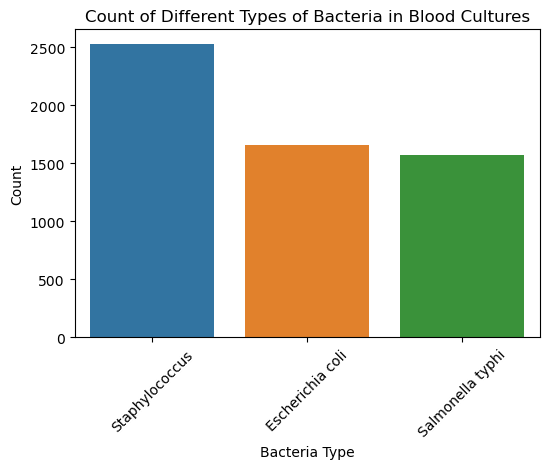

In [27]:
#Hypothesis 9: The count of different types of bacteria found in blood cultures follows a specific pattern.

import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Blood Culture Bacteria' and calculate the count of each type of bacteria
bacteria_counts = df['Blood Culture Bacteria'].value_counts()

# Plotting the counts of different types of bacteria
plt.figure(figsize=(6, 4))
sns.barplot(x=bacteria_counts.index, y=bacteria_counts.values)
plt.title('Count of Different Types of Bacteria in Blood Cultures')
plt.xlabel('Bacteria Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Treatment success rates by Blood Culture Bacteria:
Treatment Outcome       Successful  Unsuccessful
Blood Culture Bacteria                          
Escherichia coli          0.579710      0.420290
Salmonella typhi          0.616508      0.383492
Staphylococcus            0.575326      0.424674


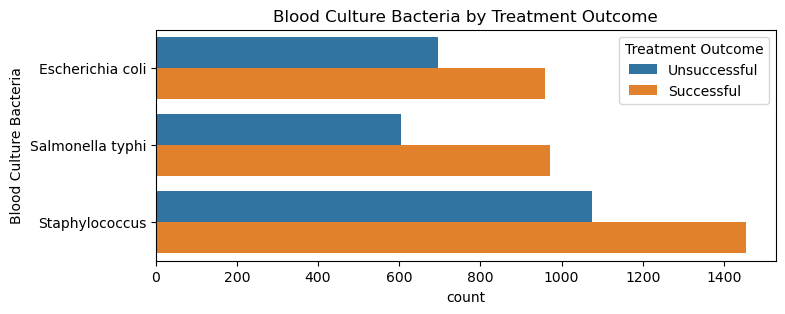

In [28]:
# Hypothesis 1: Bacterial infections and treatment success rates

# Descriptive statistics for Blood Culture Bacteria
bacteria_treatment_success = df.groupby('Blood Culture Bacteria')['Treatment Outcome'].value_counts(normalize=True).unstack()
print("Treatment success rates by Blood Culture Bacteria:")
print(bacteria_treatment_success)

# Visualization
plt.figure(figsize=(8, 3))
sns.countplot(y='Blood Culture Bacteria', hue='Treatment Outcome', data=df)
plt.title('Blood Culture Bacteria by Treatment Outcome')
plt.show()


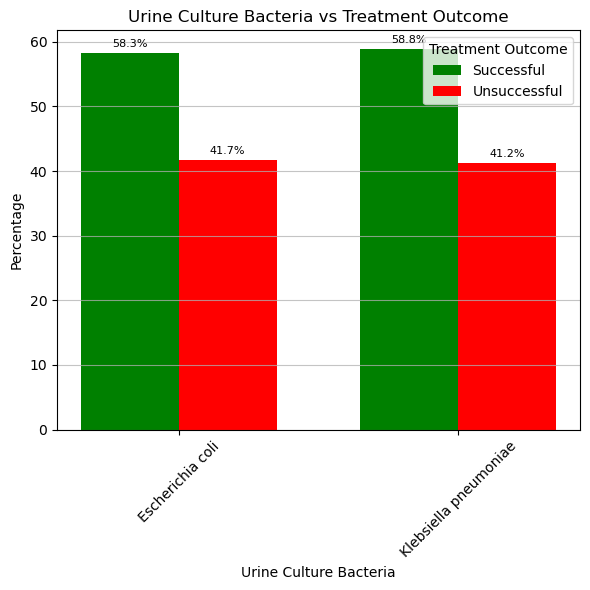

In [29]:
# Filter out rows where 'Urine Culture Bacteria' is '-'
df_filtered = df[df['Urine Culture Bacteria'] != '-']

# Group by 'Urine Culture Bacteria' and 'Treatment Outcome', and calculate counts
bacteria_outcome_counts = df_filtered.groupby(['Urine Culture Bacteria', 'Treatment Outcome']).size().unstack(fill_value=0)

# Calculate percentages for each 'Urine Culture Bacteria' category
bacteria_outcome_percentages = bacteria_outcome_counts.div(bacteria_outcome_counts.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(6, 6))

# Plot each 'Treatment Outcome' category as a separate grouped bar
bacteria_categories = bacteria_outcome_counts.index
bar_width = 0.35
x = range(len(bacteria_categories))

# Plotting Successful Outcome
successful_bars = plt.bar(x, bacteria_outcome_percentages['Successful'], width=bar_width, label='Successful', color='g')

# Plotting Unsuccessful Outcome
unsuccessful_bars = plt.bar([i + bar_width for i in x], bacteria_outcome_percentages['Unsuccessful'], width=bar_width, label='Unsuccessful', color='r')

# Annotate bars with percentages
for bars in [successful_bars, unsuccessful_bars]:
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}%',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=8)

plt.xlabel('Urine Culture Bacteria')
plt.ylabel('Percentage')
plt.title('Urine Culture Bacteria vs Treatment Outcome')
plt.xticks([i + bar_width / 2 for i in x], bacteria_categories, rotation=45)
plt.legend(title='Treatment Outcome', loc='upper right')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

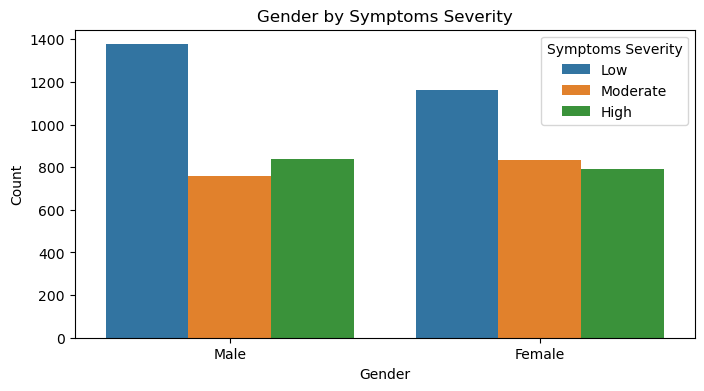

In [30]:
# Hypothesis 14: Gender has a significant effect on the severity of symptoms.
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', hue='Symptoms Severity', data=df, order=['Male', 'Female'])
plt.title('Gender by Symptoms Severity')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Symptoms Severity')
plt.show()


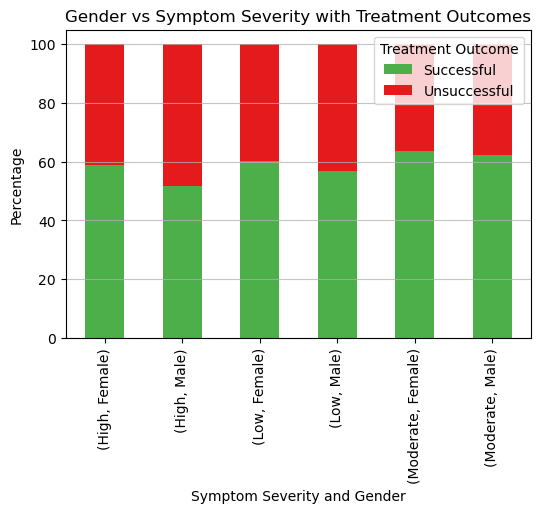

In [31]:
severity_gender_outcome = df.groupby(['Symptoms Severity', 'Gender', 'Treatment Outcome']).size().unstack(fill_value=0)
severity_gender_total = severity_gender_outcome.sum(axis=1)
severity_gender_percentage = severity_gender_outcome.div(severity_gender_total, axis=0) * 100

severity_gender_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#4daf4a', '#e41a1c'])
plt.title('Gender vs Symptom Severity with Treatment Outcomes')
plt.xlabel('Symptom Severity and Gender')
plt.ylabel('Percentage')
plt.legend(title='Treatment Outcome')
plt.grid(axis='y', alpha=0.75)
plt.show()


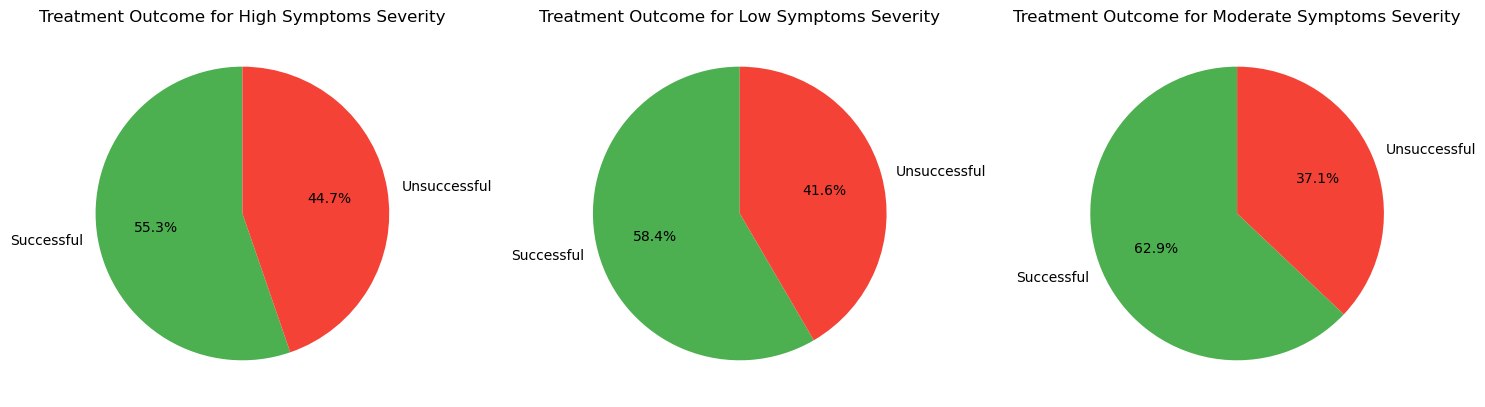

In [32]:

# Create the pivot table
outcome_counts = df.pivot_table(index='Symptoms Severity', columns='Treatment Outcome', aggfunc='size', fill_value=0)

# Plot pie charts for each symptom severity in a horizontal layout
num_severities = len(outcome_counts.index)
fig, axes = plt.subplots(1, num_severities, figsize=(num_severities * 5, 5))

for ax, severity in zip(axes, outcome_counts.index):
    outcome_counts.loc[severity].plot.pie(
        ax=ax,
        autopct='%1.1f%%', 
        startangle=90, 
        labels=['Successful', 'Unsuccessful'],
        colors=['#4CAF50', '#F44336'],
        title=f'Treatment Outcome for {severity} Symptoms Severity'
    )
    ax.set_ylabel('')  # Hide the y-label

plt.tight_layout()
plt.show()

Treatment success rates by Current Medication:
Treatment Outcome   Successful  Unsuccessful
Current Medication                          
Amoxicillin           0.560156      0.439844
Azithromycin          0.640083      0.359917
Ceftriaxone           0.563063      0.436937


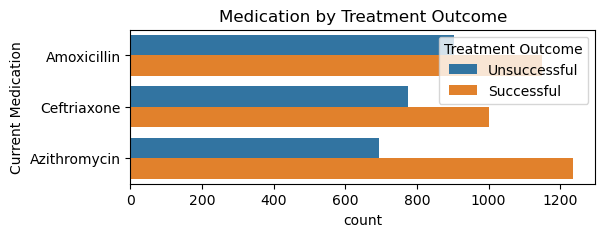

In [33]:
#4:Do certain medications demonstrate better efficiency for bacterial in

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame

# Descriptive statistics for Current Medication
med_bacteria_success = df.groupby('Current Medication')['Treatment Outcome'].value_counts(normalize=True).unstack()
print("Treatment success rates by Current Medication:")
print(med_bacteria_success)

# Visualization
plt.figure(figsize=(6, 2))
sns.countplot(y='Current Medication', hue='Treatment Outcome', data=df)
plt.title('Medication by Treatment Outcome')
plt.show()


# MULTIVARIATE 

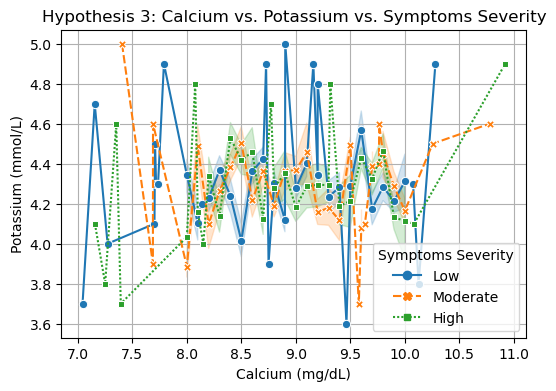

In [34]:
# Hypothesis 3: Calcium Levels and Potassium Levels Influence Symptoms Severity
plt.figure(figsize=(6, 4))
sns.lineplot(x='Calcium (mg/dL)', y='Potassium (mmol/L)', hue='Symptoms Severity', data=df, markers=True, style='Symptoms Severity')
plt.title('Hypothesis 3: Calcium vs. Potassium vs. Symptoms Severity')
plt.xlabel('Calcium (mg/dL)')
plt.ylabel('Potassium (mmol/L)')
plt.legend(title='Symptoms Severity')
plt.grid(True)
plt.show()


the graph suggests that as calcium levels increase, potassium levels tend to increase more noticeably in individuals with HIGH symptoms severity compared to those with low or moderate symptoms severity. However, there is considerable variability in potassium levels across all groups.

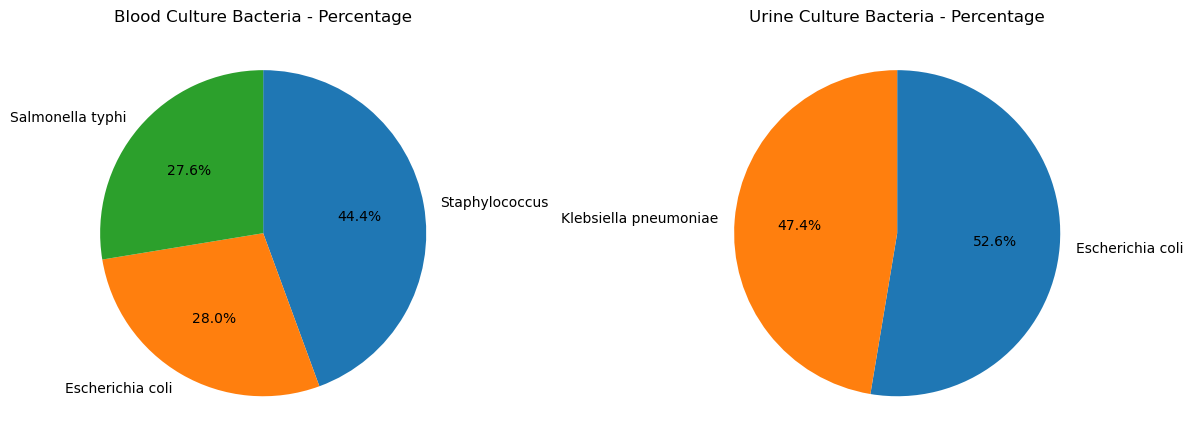

In [35]:
# Filter out rows where 'Blood Culture Bacteria' or 'Urine Culture Bacteria' is '-'
filtered_df = df[(df['Blood Culture Bacteria'] != '-') & (df['Urine Culture Bacteria'] != '-')]

# Calculate the percentage of each bacteria in 'Blood Culture Bacteria'
blood_culture_percentage = filtered_df['Blood Culture Bacteria'].value_counts(normalize=True) * 100

# Calculate the percentage of each bacteria in 'Urine Culture Bacteria'
urine_culture_percentage = filtered_df['Urine Culture Bacteria'].value_counts(normalize=True) * 100

# Plot pie chart for Blood Culture Bacteria
plt.figure(figsize=(12, 6))

# Blood Culture Bacteria Pie Chart
plt.subplot(1, 2, 1)
plt.pie(blood_culture_percentage, labels=blood_culture_percentage.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Blood Culture Bacteria - Percentage')

# Urine Culture Bacteria Pie Chart
plt.subplot(1, 2, 2)
plt.pie(urine_culture_percentage, labels=urine_culture_percentage.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Urine Culture Bacteria - Percentage')

plt.tight_layout()
plt.show()

It is seen that many patients have staphylococcus in their blood as a bacteria  and E.coli in the urine culture



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0-30'),
  Text(1, 0, '31-40'),
  Text(2, 0, '41-50'),
  Text(3, 0, '51-60'),
  Text(4, 0, '61+')])

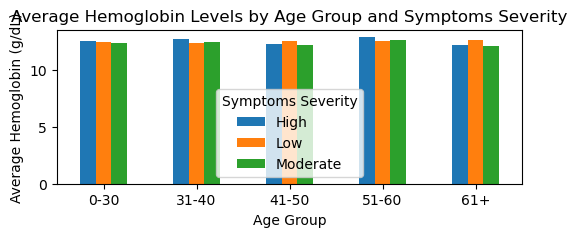

In [36]:
#Hypothesis 2: Age and Symptoms Severity impact Hemoglobin Levels
# Create age groups
data['Age Group'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '31-40', '41-50', '51-60', '61+'])

# Calculate average Hemoglobin levels for each age group and symptoms severity
avg_hemoglobin = data.groupby(['Age Group', 'Symptoms Severity'])['Hemoglobin (g/dL)'].mean().unstack()

# Plot a bar chart
avg_hemoglobin.plot(kind='bar', figsize=(6, 2))
plt.title('Average Hemoglobin Levels by Age Group and Symptoms Severity')
plt.xlabel('Age Group')
plt.ylabel('Average Hemoglobin (g/dL)')
plt.xticks(rotation=0)

In the age range 50-60 it is seen that many people are suffering from high severity of typhoid fever

object


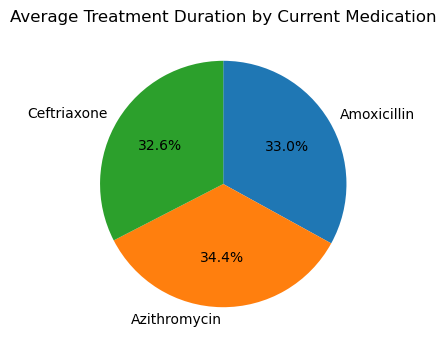

In [37]:

# Check the data types of 'Treatment Duration' column
print(data['Treatment Duration'].dtype)

# Convert 'Treatment Duration' to numeric
data['Treatment Duration'] = data['Treatment Duration'].astype(str).str.split().str[0].astype(int)

# Calculate average treatment duration for each medication
avg_duration = data.groupby('Current Medication')['Treatment Duration'].mean()

# Plot a pie chart
plt.figure(figsize=(4, 4))
plt.pie(avg_duration, labels=avg_duration.index, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Average Treatment Duration by Current Medication')
plt.show()


From the above pie chart we can conclude that azithromycin takes some more time than other two medication

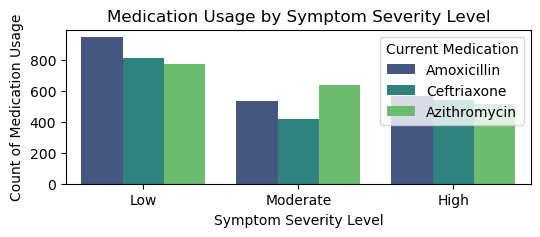

In [38]:
# Create bar chart to compare medication usage across symptom severity levels
plt.figure(figsize=(6, 2))
sns.countplot(x='Symptoms Severity', hue='Current Medication', data=data, palette='viridis')
plt.title('Medication Usage by Symptom Severity Level')
plt.xlabel('Symptom Severity Level')
plt.ylabel('Count of Medication Usage')
plt.legend(title='Current Medication', loc='upper right')
plt.show()

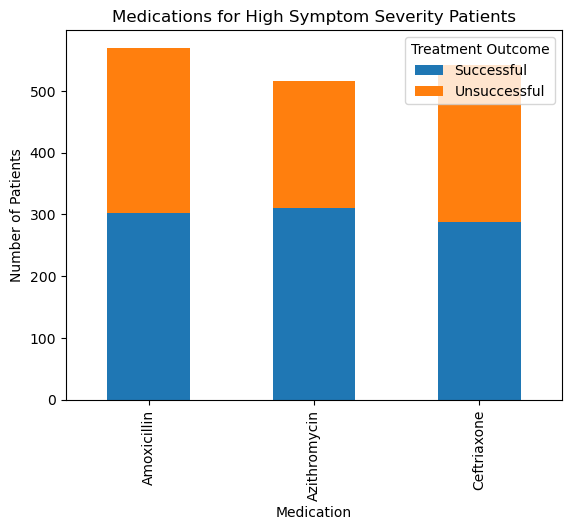

In [39]:
#Which medication is helping for high symptom severity patients?
# Filter for high symptom severity patients
df=data.copy()
high_severity = df[df['Symptoms Severity'] == 'High']

# Group by Medication and Treatment Outcome
medication_outcome = high_severity.groupby(['Current Medication', 'Treatment Outcome']).size().unstack().fillna(0)

# Plot
medication_outcome.plot(kind='bar', stacked=True)
plt.title('Medications for High Symptom Severity Patients')
plt.xlabel('Medication')
plt.ylabel('Number of Patients')
plt.legend(title='Treatment Outcome')
plt.show()


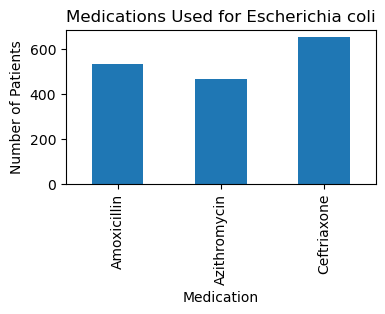

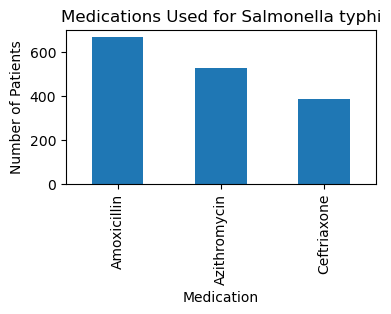

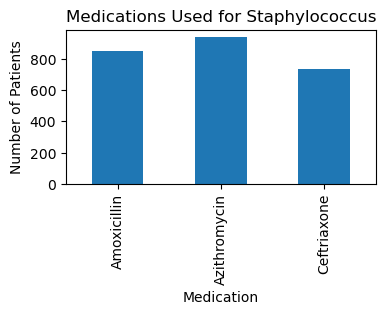

In [40]:
# For which blood culture bacteria which medication is used?

# Group by Blood Culture Bacteria and Medication
bacteria_medication = df.groupby(['Blood Culture Bacteria', 'Current Medication']).size().unstack().fillna(0)

# Plot for each blood culture bacteria separately
for bacteria in bacteria_medication.index:
    bacteria_medication.loc[bacteria].plot(kind='bar', figsize=(4, 2))
    plt.title(f'Medications Used for {bacteria}')
    plt.xlabel('Medication')
    plt.ylabel('Number of Patients')
    plt.show()


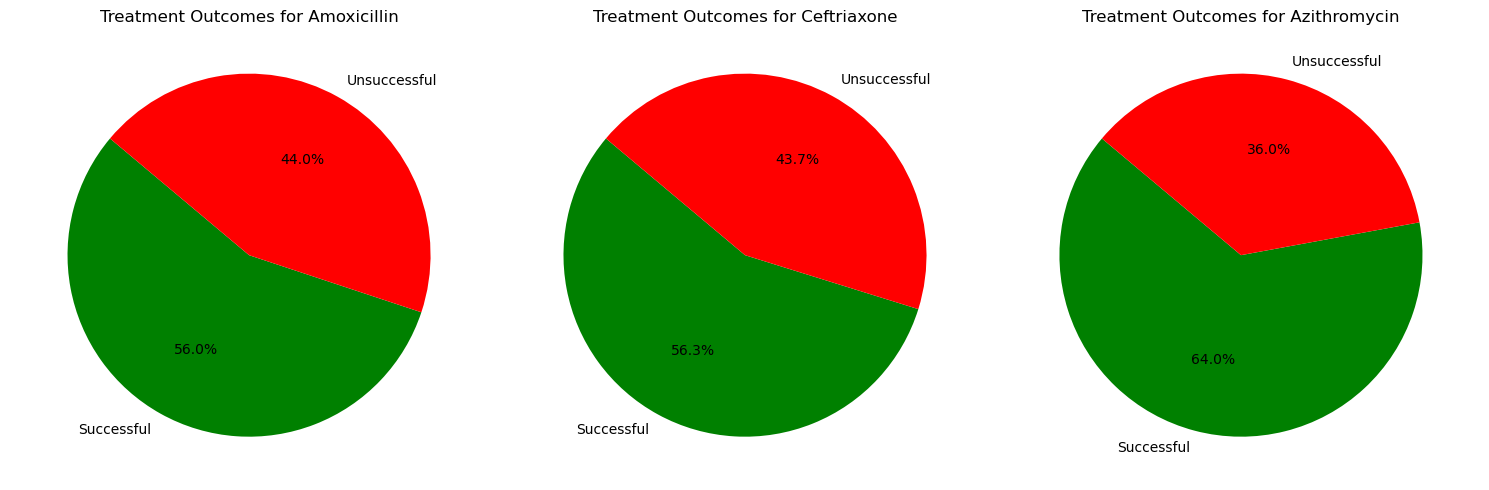

In [41]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Get a list of unique medications
medications = df['Current Medication'].unique()

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot each pie chart
for i, medication in enumerate(medications):
    # Filter the dataframe for the current medication
    medication_data = df[df['Current Medication'] == medication]
    
    # Count the treatment outcomes
    outcome_counts = medication_data['Treatment Outcome'].value_counts()
    
    # Plot
    axs[i].pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
    axs[i].set_title(f'Treatment Outcomes for {medication}')
    axs[i].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

unique_ages = sorted(df['Age'].unique())

# Display the sorted unique values
print("Unique values in 'age' column in ascending order:")
print(unique_ages)

Unique values in 'age' column in ascending order:
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


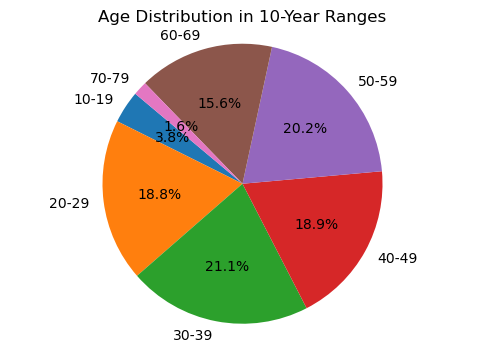

In [43]:


bins = [ 10, 20, 30, 40, 50, 60, 70, 80]
labels = [ '10-19', '20-29', '30-39', '40-49', '50-59', '60-69','70-79']

df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


age_group_counts = df['age_group'].value_counts().sort_index()

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution in 10-Year Ranges')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()
